In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Train.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

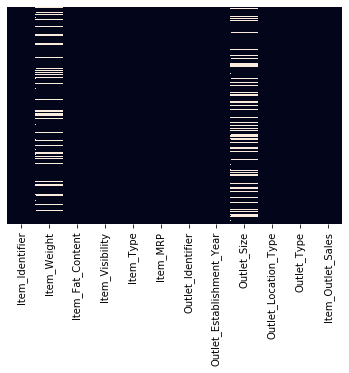

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [6]:
train['Item_Weight'] = train.groupby(['Item_Type'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [7]:
train['Outlet_Size'] = train.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [8]:
train.drop('Item_Identifier',axis=1,inplace=True)

In [9]:
train.drop('Outlet_Identifier',axis=1,inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [11]:
columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [12]:
len(columns)

5

In [13]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [14]:
main_df=train.copy()

In [15]:
test=pd.read_csv('formulatedtest.csv')

In [16]:
test.shape

(5681, 9)

In [17]:
train.shape

(8523, 10)

In [18]:
final_df=pd.concat([train,test],axis=0)

In [19]:
final_df.shape

(14204, 10)

In [20]:
final_df=category_onehot_multcols(columns)

Item_Fat_Content
Item_Type
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [21]:
final_df.shape

(14204, 31)

In [22]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [23]:
final_df.shape

(14204, 31)

In [24]:
df_train=final_df.iloc[:8523,:]
df_test=final_df.iloc[8523:,:]

In [25]:
df_test.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Low Fat,Regular,low fat,reg,Breads,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,107.8622,NaN,0.007565,20.75000,1999,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,87.3198,NaN,0.038428,8.30000,2007,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,241.7538,NaN,0.099575,14.60000,1998,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,155.0340,NaN,0.015388,7.31500,2007,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
4,234.2300,NaN,0.118599,12.95504,1985,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [26]:
df_test.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [27]:
df_test.shape

(5681, 30)

In [28]:
X_train=df_train.drop('Item_Outlet_Sales',axis=1)
y_train=df_train['Item_Outlet_Sales']

# Model Training and prediction

In [54]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
classifier=xgboost.XGBRegressor()

In [62]:
## Hyper Parameter Optimization


n_estimators = [100, 500]
max_depth = [2, 3]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
base_score=[0.25,0.5,0.75,1]
min_child_weight=[1,2,3]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [63]:
grid_cv=GridSearchCV(classifier, param_grid=hyperparameter_grid, n_jobs=-1)

In [33]:
# Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=classifier,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = -1,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

In [64]:
grid_search = grid_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [35]:
# grid_cv.best_estimator_

In [56]:
classifier.fit(X_train,y_train)

[07:58:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [58]:
y_pred=classifier.predict(df_test)

In [59]:
y_pred

array([1606.9955 , 1406.9805 ,  724.98846, ..., 1799.8329 , 3961.585  ,
       1311.1138 ], dtype=float32)

In [60]:
pred=pd.DataFrame(y_pred)

In [52]:
sub_df=pd.read_csv('SampleSubmission.csv')

In [61]:
dataset=pd.concat([sub_df['Item_Identifier'],sub_df['Outlet_Identifier'],pred],axis=1)
dataset.columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
dataset.to_csv('SampleSubmission01.csv',index=False)